<a href="https://colab.research.google.com/github/MoudiAlhazzaa/Machine_learning_Project/blob/main/T5_Project_Module_4_Machine_Learning_Nawaf_Moudi_Zahrah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparative Analysis of Machine Learning Models on the Iris Dataset Analysis**
### BY: Nawaf Aljalaud / ... / ...
#### "SDAIA Bootcamp T5": Project-Module 4 Machine Learning


##Tasks and Mark Distribution:

##1. Data Preprocessing


 * Load the Iris dataset.



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, names=columns)

* Perform data exploration and visualization.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration
print(iris.head())
print(iris.tail())
print(iris.sample(5))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica
     sepal_length  sepal_width  petal_length  petal_width          species
85            6.0          3.4           4.5          1.6  Iris-ver

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
num_rows, num_cols = iris.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 150
Number of columns: 5


In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

* visualization using Swarmplots to show the distribution of measurements by species.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


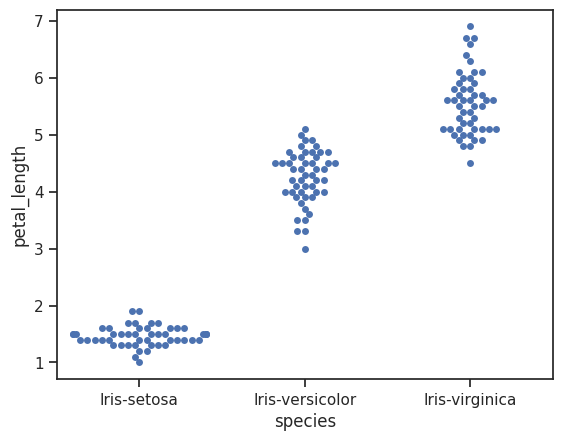

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


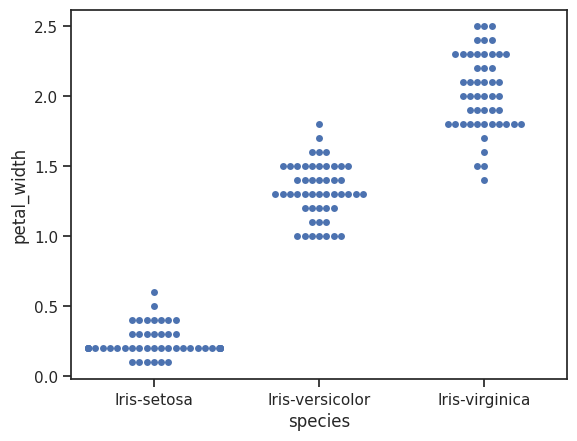

In [ ]:
#species vs petal_length
sns.swarmplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

#species vs petal_width
sns.swarmplot(x = 'species', y = 'petal_width', data = iris)
plt.show()

* Check for missing values and handle them if any.

In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
dup_rows = iris.duplicated()
dup_rows

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
iris.describe(include='object')

,species
count,150
unique,3
top,Iris-setosa
freq,50


* Split the dataset into features and the target variable

In [ ]:
X = iris.drop('species', axis=1)
y = iris['species']

In [ ]:
print(f"The dimmension of Dataset: {iris.shape}")

The dimmension of Dataset: (150, 5)


In [ ]:
iris.groupby("species").size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<ipython-input-88-0cf1be18efaf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=iris, palette='pastel')  # corrected x parameter


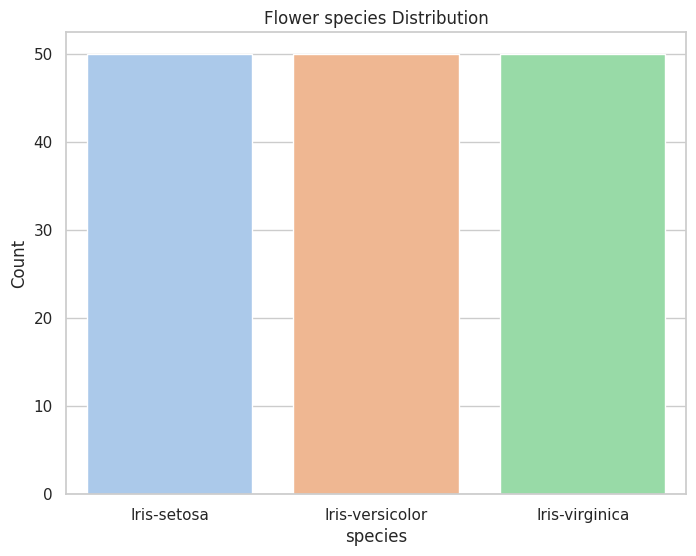

In [ ]:
sns.set_style("whitegrid")

# plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=iris, palette='pastel')  # corrected x parameter
plt.title('Flower species Distribution')
plt.ylabel('Count', size=12)  # corrected ylabel
plt.xlabel('species', size=12)  # corrected xlabel
plt.show()

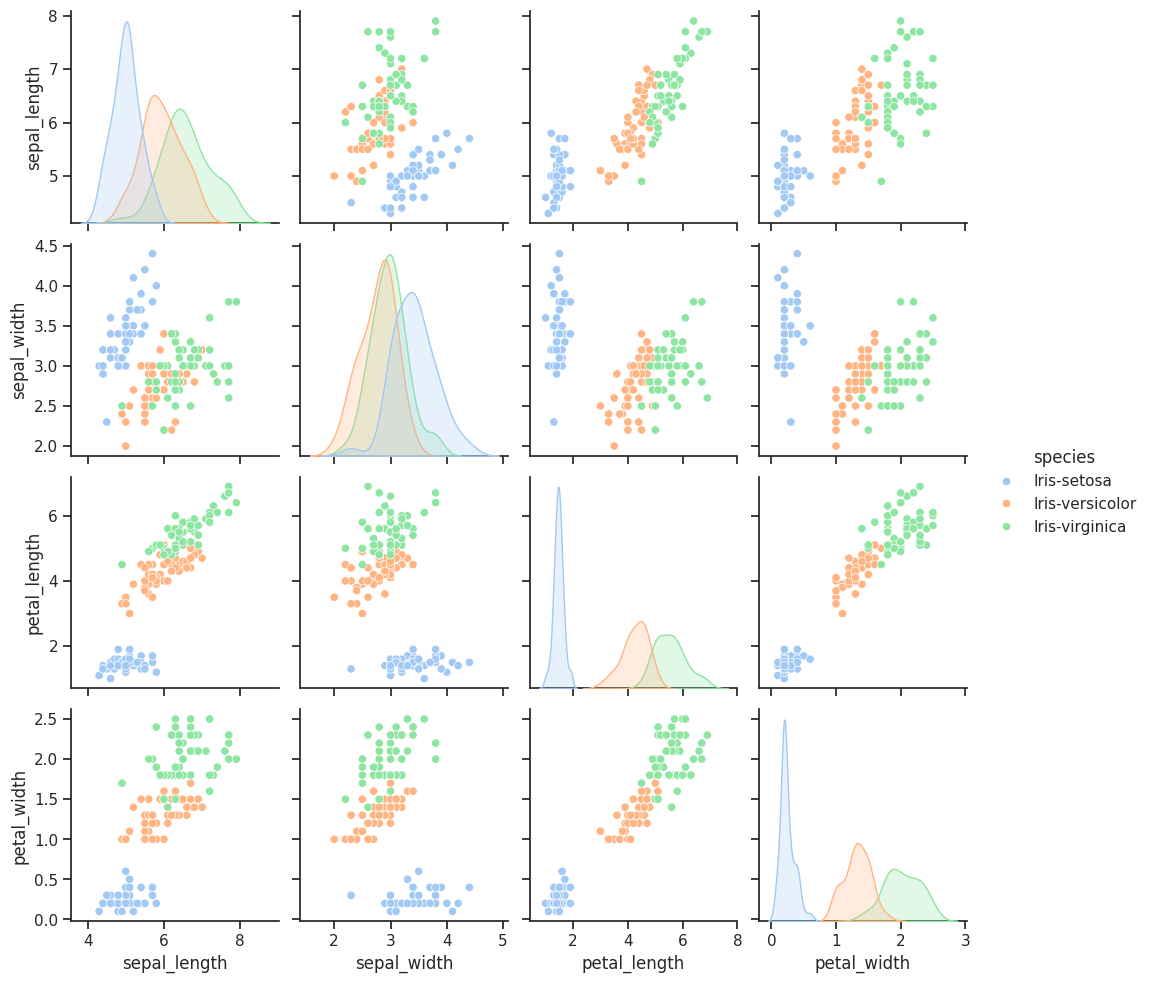

In [ ]:
sns.set(style='ticks')
sns.pairplot(iris, hue='species', palette='pastel')


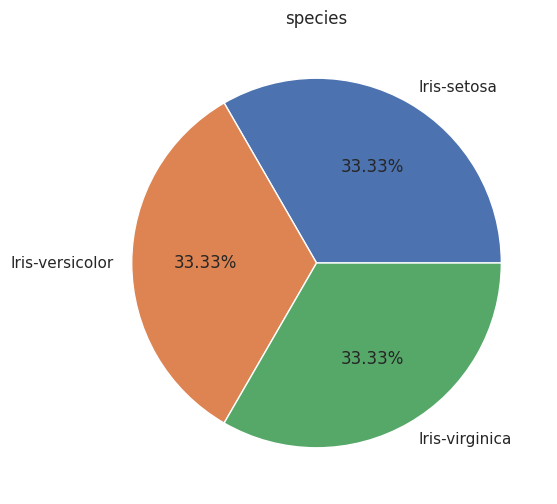

In [ ]:
plt.figure(figsize=(14,6))
iris['species'].value_counts().plot(kind='pie',
                                  autopct='%0.2f%%',ylabel='',
                                  title='species');

##2. Unsupervised Learning: Clustering and Outlier Detection


* Apply K-means clustering algorithm to cluster the data.
* Visualize the clusters.





---------------------------------------------------

Import the important libries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score


By selecting specific columns from the dataset, creating a new dataset X that includes only the features related to the sepal length and sepal width.

In [6]:
X = iris[['sepal_length', 'sepal_width']]

A Scatter plot to visualize the relationship between the sepal length and sepal width.
 The x-axis represents the sepal length, the y-axis represents the sepal width, and each data point is plotted as a marker on the graph.

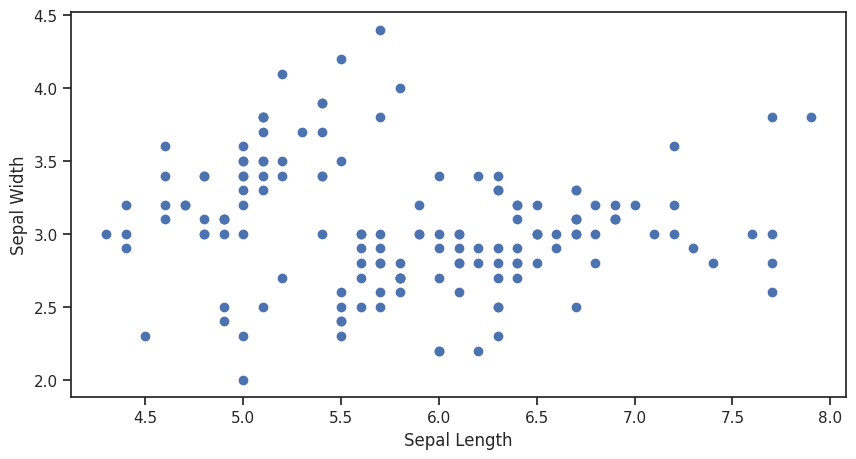

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x= X['sepal_length'], y=X['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');

Performing the K-means clustering algorithm on the X dataset, aim to partition the data into 3 clusters based on the values of the features 'sepal_length' and 'sepal_width'.

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state =42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

A scatter plot to visualize the relationship between the sepal length and sepal width. This plot can help visualize how well the K-means algorithm grouped the data points into clusters based on their features.

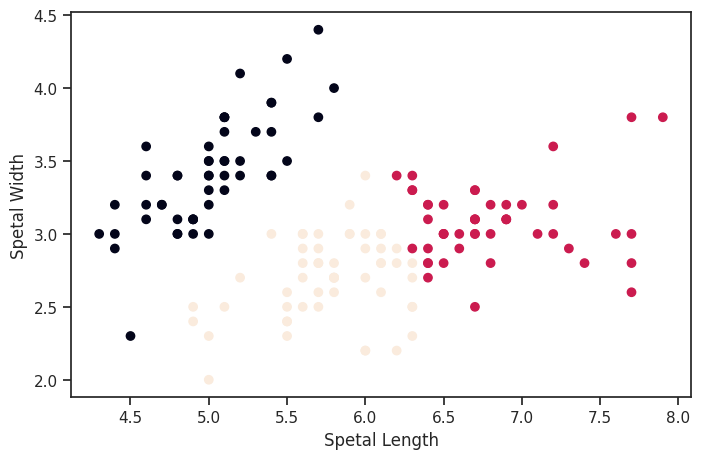

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= kmeans.labels_)
plt.xlabel('Spetal Length')
plt.ylabel('Spetal Width');

To retrieve the cluster labels of each data point

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

 Detect outliers using appropriate technique DBSCAN.

------------------------------------------------

 * The eps specifies the max distance between two data points for them to be considered as neighbors.
 * The min_samples parameter indicates the mini number of data points.
  Aim to identify clusters and outliers based eps and min_sample).

In [17]:
model = DBSCAN(eps=0.2, min_samples=5) # parameters are epsilon and mini num of points
model = model.fit(X)

Print the cluster labels. The cluster labels can be pos integers representing different clusters or zero representing noise points.

In [ ]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
model.core_sample_indices_

array([  0,   1,   2,   3,   4,   6,   7,   9,  11,  12,  17,  19,  21,
        23,  24,  25,  26,  27,  28,  29,  30,  34,  35,  37,  39,  40,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  54,  55,
        56,  58,  61,  63,  64,  65,  66,  67,  69,  70,  71,  73,  74,
        75,  77,  78,  79,  80,  81,  82,  83,  86,  88,  89,  90,  91,
        92,  94,  95,  96,  97,  99, 100, 101, 102, 103, 104, 110, 111,
       112, 113, 114, 115, 116, 120, 121, 123, 124, 126, 127, 128, 132,
       133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147,
       149])

Print the set of unique cluster labels.

In [ ]:
set(model.labels_)

{-1, 0, 1}

Obtain information about the clusters.

In [18]:
n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_noise_ = list(model.labels_).count(-1)

print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)

Number of clusters: 3
Number of noise points: 47


 Evaluate the clustering results.

-----------------------------------

Silhouette score is 0.702, it indicates that the clusters identified by the K-means algorithm in the given dataset have a relatively good separation and cohesion.

In [ ]:
X, y = make_blobs(random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
silhouette_score(X, kmeans.fit_predict(X))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7020937832636733

## 3. Supervised Learning: Baseline Model

In [ ]:
num_rows, num_cols = iris.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 150
Number of columns: 5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print(f"X Train Shape: {X_train.shape}")
print(f"X Test Shape: {X_test.shape}")
print(f"Y Train Shape: {y_train.shape}")
print(f"Y Test Shape: {y_test.shape}")

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

X Train Shape: (70, 2)
X Test Shape: (30, 2)
Y Train Shape: (70,)
Y Test Shape: (30,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 7  0  0]
 [ 0  9  0]
 [ 0  0 14]]


## Model Comparison


We evaluates the performance of four machine learning algorithms : K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Random Forest, and Gradient Boosting using cross-validation, and its accuracy is assessed through 5-fold cross-validation, printing the mean accuracy for each.

This help to identify which models might be more promising and worth further tuning and analysis.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{name} Accuracy: {scores.mean():.2f}')

KNN Accuracy: 1.00
SVM Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
